In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
# Importing data from CSV file
df = pd.read_csv("220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

#Dropping data having date after 2020
df = df[df.JAHR <= 2020]

In [3]:
#Count of NAN values in each column
df.isnull().sum().reset_index(name='Null_Count')

,index,Null_Count
0,MONATSZAHL,0
1,AUSPRAEGUNG,0
2,JAHR,0
3,MONAT,0
4,WERT,0
5,VORJAHRESWERT,91
6,VERAEND_VORMONAT_PROZENT,155
7,VERAEND_VORJAHRESMONAT_PROZENT,92
8,ZWOELF_MONATE_MITTELWERT,147


In [4]:
df.MONAT.unique()

array(['Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '201405',
       '201406', '201407', '201408', '201409', '201410', '201411',
       '201412', '201301', '201302', '201303', '201304', '20130

In [5]:
# as observed in column  MONAT has a variable 'Summe' which reapeates after every 12 months. Thus making two separate dataframe.
#  - one with yearly data
#  - one with monthly data.


df_monthly = df[df.MONAT != 'Summe']
df_yearly = df[df.MONAT == 'Summe']

#resetting index

df_monthly.reset_index(drop=True, inplace=True)
df_yearly.reset_index(drop=True, inplace=True)

In [6]:
temp = df_monthly.groupby(['MONATSZAHL','JAHR'])['WERT'].sum().reset_index(name='wert')

# Plot historical data.

In [7]:
h_df = temp.pivot(index='JAHR', columns='MONATSZAHL', values='wert')

In [8]:
h_df.reset_index(inplace=True)

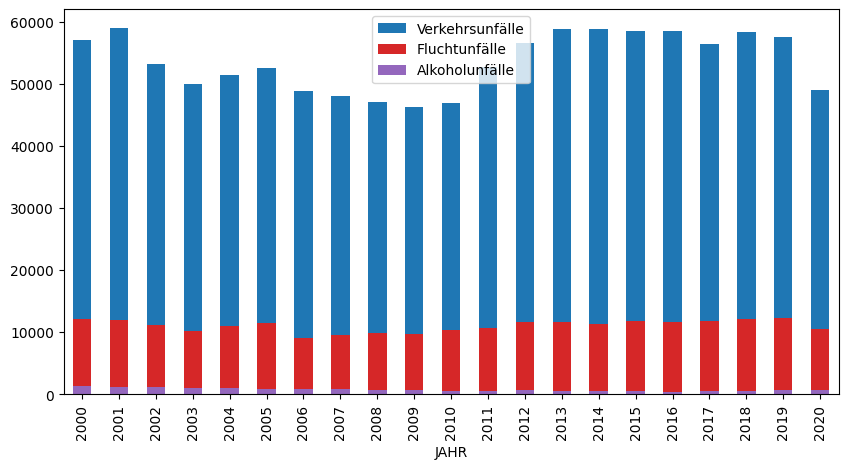

In [15]:



ax = h_df.plot(x='JAHR', y ='Verkehrsunfälle', kind='bar')   #Verkehrsunfälle
h_df.plot(x='JAHR', y ='Fluchtunfälle', kind='bar',ax=ax, color='C3')
h_df.plot(x='JAHR', y ='Alkoholunfälle', kind='bar',ax=ax, color='C4')


plt.show() 